In [1]:
#Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos,
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
#asignamos nombres cortos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# usar "shift+enter" para procesar la información de la celda
#


In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('caborca.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HHMM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2018,17:00,94.0,334.0,6.28,20.3,18.7,26.0,997.6,0.0,520.2
1,26/01/2018,18:00,193.0,200.0,6.43,19.8,21.2,30.0,997.8,0.0,630.3
2,26/01/2018,19:00,182.0,192.0,18.33,37.3,21.8,37.0,997.0,0.0,645.8
3,26/01/2018,20:00,187.0,199.0,22.03,46.3,22.3,34.0,996.2,0.0,689.0
4,26/01/2018,21:00,198.0,206.0,26.07,55.9,22.3,30.0,995.7,0.0,641.7


In [4]:
#Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HHMM           object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HHMM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HHMM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,94.0,334.0,6.28,20.3,18.7,26.0,997.6,0.0,520.2,2018-01-26 17:00:00
1,193.0,200.0,6.43,19.8,21.2,30.0,997.8,0.0,630.3,2018-01-26 18:00:00
2,182.0,192.0,18.33,37.3,21.8,37.0,997.0,0.0,645.8,2018-01-26 19:00:00
3,187.0,199.0,22.03,46.3,22.3,34.0,996.2,0.0,689.0,2018-01-26 20:00:00
4,198.0,206.0,26.07,55.9,22.3,30.0,995.7,0.0,641.7,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,166.000000,166.000000,166.0,165.000000
mean,183.916168,203.335329,15.745629,32.202994,22.386228,34.204819,994.701807,0.0,192.061818
std,87.589294,88.052053,7.423569,13.085536,76.258840,12.127364,2.009839,0.0,265.878438
min,22.000000,33.000000,1.730000,13.900000,3.400000,16.000000,989.800000,0.0,0.000000
25%,103.000000,130.000000,10.905000,22.650000,10.600000,26.000000,993.050000,0.0,0.000000
50%,193.000000,203.000000,14.370000,27.900000,14.900000,33.000000,995.000000,0.0,0.000000
75%,268.000000,276.500000,18.010000,38.100000,22.400000,39.750000,996.200000,0.0,457.300000
max,356.000000,353.000000,40.420000,70.200000,997.200000,72.000000,999.100000,0.0,731.800000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
50,186.0,195.0,11.73,28.4,24.1,21.0,995.7,0.0,698.5,2018-01-28 19:00:00
151,207.0,217.0,23.40,44.6,24.2,32.0,993.7,0.0,126.8,2018-02-02 00:00:00


In [10]:

# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      183.916168
DIRR      203.335329
VELS       15.745629
VELR       32.202994
TEMP       22.386228
HR         34.204819
PB        994.701807
PREC        0.000000
RADSOL    192.061818
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

22.38622754491018

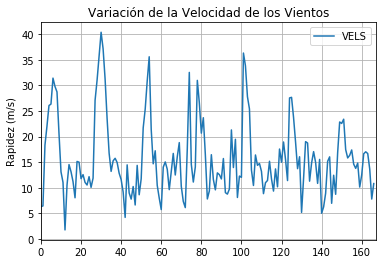

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Velocidad de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

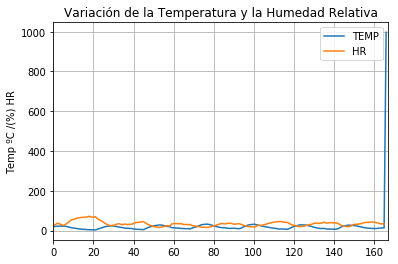

In [13]:

# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

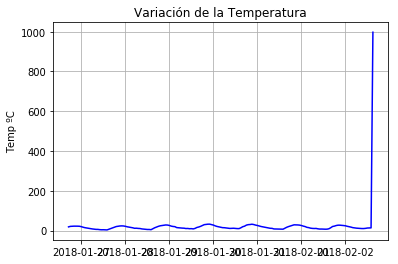

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

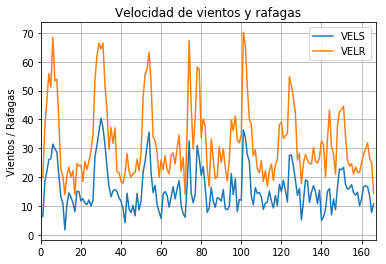

In [15]:
#Haremos una gráfica que muestre la rapidez de los vientos y las rafagas en función del tiempo
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Velocidad de vientos y rafagas")
plt.ylabel("Vientos / Rafagas")
plt.grid(True)
plt.show()


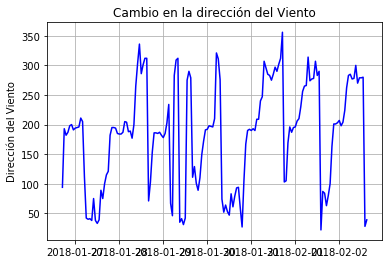

In [16]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Cambio en la dirección del Viento")
plt.ylabel("Dirección del Viento")
plt.grid(True)
plt.show()

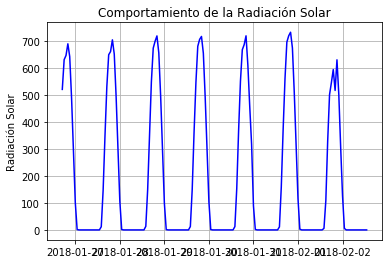

In [17]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Comportamiento de la Radiación Solar")
plt.ylabel("Radiación Solar")
plt.grid(True)
plt.show()

In [18]:
#Diferencia entre la temperatura maxima y minima 
df.TEMP.min()


3.3999999999999999

In [19]:
df.TEMP.max()

997.20000000000005

In [21]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,167.000000,167.000000,167.000000,167.000000,167.000000,166.000000,166.000000,166.0,165.000000
mean,183.916168,203.335329,15.745629,32.202994,22.386228,34.204819,994.701807,0.0,192.061818
std,87.589294,88.052053,7.423569,13.085536,76.258840,12.127364,2.009839,0.0,265.878438
min,22.000000,33.000000,1.730000,13.900000,3.400000,16.000000,989.800000,0.0,0.000000
25%,103.000000,130.000000,10.905000,22.650000,10.600000,26.000000,993.050000,0.0,0.000000
50%,193.000000,203.000000,14.370000,27.900000,14.900000,33.000000,995.000000,0.0,0.000000
75%,268.000000,276.500000,18.010000,38.100000,22.400000,39.750000,996.200000,0.0,457.300000
max,356.000000,353.000000,40.420000,70.200000,997.200000,72.000000,999.100000,0.0,731.800000


In [22]:
df2= df.loc[0:6, ['FECHA','TEMP']]

In [23]:
df2

,FECHA,TEMP
0,2018-01-26 17:00:00,18.7
1,2018-01-26 18:00:00,21.2
2,2018-01-26 19:00:00,21.8
3,2018-01-26 20:00:00,22.3
4,2018-01-26 21:00:00,22.3
5,2018-01-26 22:00:00,22.2
6,2018-01-26 23:00:00,21.7


In [25]:
tmin=df2.min()
tmax=df2.max()
tpromedio= tmax-tmin
tpromedio

FECHA    0 days 06:00:00
TEMP                 3.6
dtype: object